In [2]:
import os
import csv
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(A, theta):
    A1, A2 = A
    h = 1.0 / (1.0 + np.exp(A1 + A2 * theta))
    return h

def sigmoid_cost(A, theta, y, m):
    h = sigmoid(A, theta)
    J = -(1.0 / m) * np.sum(np.multiply(y, np.log(h)) + np.multiply((1.0 - y), np.log(1.0 - h)))
    return J

def sigmoid_grad(A, theta, y, m):
    h = sigmoid(A, theta)
    dJ = (1.0 / m) * np.sum(np.multiply((h - y), theta))
    return dJ

[1.63024994e-02 3.80452559e-14 2.80392751e-12 4.27037592e-20
 1.71834478e-16 2.27792704e-09 4.61095974e-11 5.05653109e-08
 1.30108474e-01 3.06694120e-08 1.11953595e-05 2.09337249e-15
 4.65888615e-15 3.12294478e-15 1.71834478e-16 7.72102078e-17
 6.28883850e-15 1.05306174e-20 8.57727931e-19 1.03953801e-15]
[0.9836975  1.         1.         1.         1.         1.
 1.         0.99999995 0.86989153 0.99999997 0.9999888  1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
14.412791744225983
-13.746612342513101
Optimization terminated successfully.
         Current function value: 0.228239
         Iterations: 19
         Function evaluations: 69
         Gradient evaluations: 23
[-26.57031314   0.79034785]


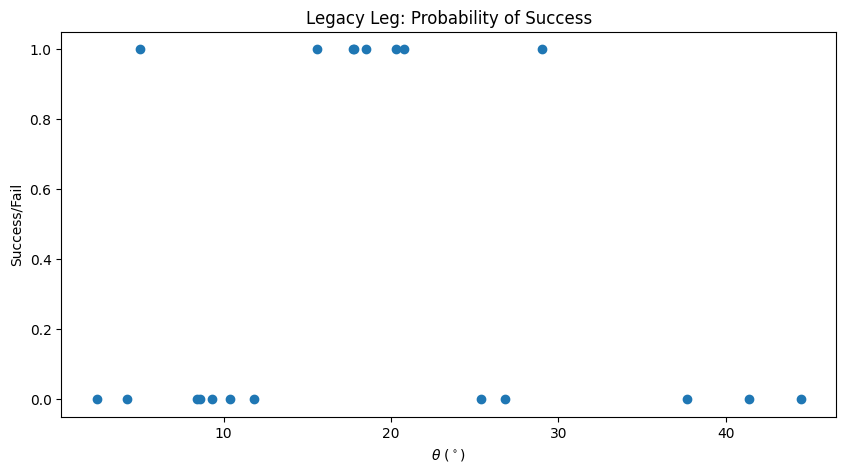

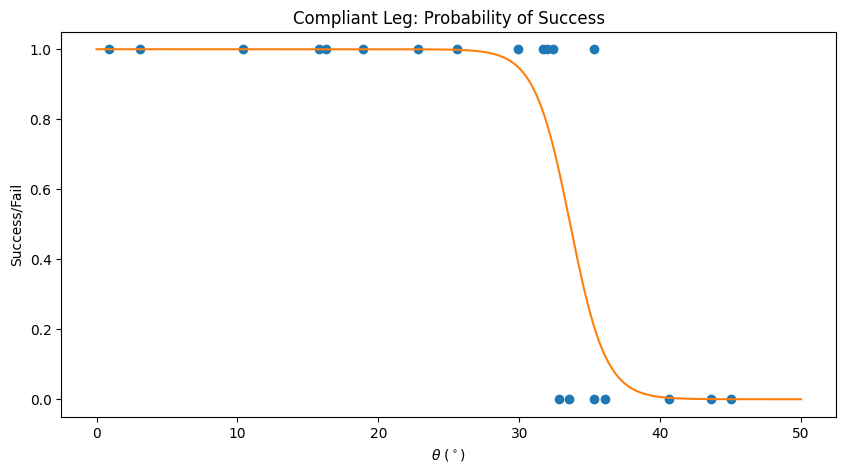

In [4]:
current_dir = os.getcwd()
filename_legacy = current_dir + r"/../Compliant Legs/Drop Test/Drop Test v4/Probability of Success/Legacy Leg/legacy_prob_success.csv"
filename_compliant = current_dir + r"/../Compliant Legs/Drop Test/Drop Test v4/Probability of Success/25-0um Kapton-TPE and 40-60 Tibia-Tarsus/compliant_prob_success.csv"

# Extract data for legacy leg probability of success tests
legacy_data = np.genfromtxt(filename_legacy, delimiter=',')
legacy_data = legacy_data[2:, 1:]
legacy_data[:,0] = 90.0 - legacy_data[:,0]

# Extract data for best compliant leg probability of success tests
compliant_data = np.genfromtxt(filename_compliant, delimiter=',')
compliant_data = compliant_data[2:, 1:]
compliant_data[:,0] = 90.0 - compliant_data[:,0]

# Plot legacy leg probability of success data
fig_legacy, ax_legacy = plt.subplots(figsize=(10, 5))
ax_legacy.set_title("Legacy Leg: Probability of Success")
ax_legacy.scatter(legacy_data[:,0], legacy_data[:,1])
ax_legacy.set_xlabel(r"$\theta$ ($^\circ$)")
ax_legacy.set_ylabel("Success/Fail")

# Plot best compliant leg probability of success data
fig_compliant, ax_compliant = plt.subplots(figsize=(10, 5))
ax_compliant.set_title("Compliant Leg: Probability of Success")
ax_compliant.scatter(compliant_data[:,0], compliant_data[:,1])
ax_compliant.set_xlabel(r"$\theta$ ($^\circ$)")
ax_compliant.set_ylabel("Success/Fail")

# Apply logistic regression to compliant leg data
x0 = [1.0, 1.0]
theta = compliant_data[:,0]
y = compliant_data[:,1]
m = len(compliant_data)

print(sigmoid(x0, theta))
print(1.0 - sigmoid(x0, theta))
print(sigmoid_cost(x0, theta, y, m))
print(sigmoid_grad(x0, theta, y, m))

# res = scipy.optimize.minimize(sigmoid_cost, x0, method='BFGS', jac=sigmoid_grad, args=(theta, y, m), options={'gtol': 1e-6, 'disp': True})
res = scipy.optimize.minimize(sigmoid_cost, x0, method='BFGS', args=(theta, y, m), options={'gtol': 1e-6, 'disp': True})
print(res.x)

A_sigmoid = res.x
theta_sigmoid = np.linspace(0, 50, 500)
y_sigmoid = sigmoid(A_sigmoid, theta_sigmoid)
ax_compliant.plot(theta_sigmoid, y_sigmoid, color="tab:orange")
